In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':'Arial'})
rc('text',usetex=True)

G-quadruplexes were predicted with pqsfinder software in R environment with the following code

In [1]:
####R environment

#library(pqsfinder)

#filepath1 <- "NEAT1_gene_all.fasta"
#sequences <- readDNAStringSet(filepath1)
#fileout = "NEAT1_GQuad"

#for (i in 1:length(sequences)) {
#  myseq <- sequences[[i]]
  
#  pqs <-pqsfinder(myseq, strand="+", verbose = FALSE)
#  if (length(pqs@elementMetadata@listData[["score"]]) > 0)
#  {
#    dss <-as(pqs, "DNAStringSet")
#    dss.df <- as.data.frame (dss)
#    row.names(dss.df)
#    gr <- as(pqs, "GRanges" )
#    gr.df <- as.data.frame (gr)
#    row.names(gr.df)
#    result <- cbind(sequences@ranges@NAMES[i],gr.df,dss.df)
#    write.table(result, file=fileout, quote=F, sep="\t", row.names=F, col.names=F,append=T)
    
#  } else 
#  { write.table(sequences@ranges@NAMES[i], file=fileout, quote=F, sep="\t", row.names=F, col.names=F,append=T)} }


In [2]:
fl = 0
GQ = {}
with open('./GQuad/NEAT1_GQuad') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        
        if dat[0] not in GQ:
            GQ[dat[0]] = []
        GQ[dat[0]].append(int(dat[2]))

json.dump(GQ, open("./GQuad/NEAT1_GQ.json","w"))           

In [3]:
print(len(GQ))
l = [len(GQ[i]) for i in GQ]
print(min(l),max(l))
print(np.mean(l), np.std(l))

515
6 49
19.236893203883493 5.938699643407975


In [8]:
fl = 0
GQ = {}
with open('./GQuad/MALAT1_GQuad') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        
        if dat[0] not in GQ:
            GQ[dat[0]] = []
        GQ[dat[0]].append(int(dat[2]))

json.dump(GQ, open("./GQuad/MALAT1_GQ.json","w"))           

In [5]:
print(len(GQ))
l = [len(GQ[i]) for i in GQ]
print(min(l),max(l))
print(np.mean(l), np.std(l))

480
4 20
9.064583333333333 1.5725496260496483


In [9]:
fl = 0
GQ = {}
with open('./GQuad/CDSs_Orthologs_GQuad') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if len(dat) > 1:
            if dat[0] not in GQ:
                GQ[dat[0]] = []
            GQ[dat[0]].append(int(dat[2]))
        else:
            GQ[dat[0]] = []
json.dump(GQ, open("./GQuad/CDSs_Orthologs_GQ.json","w"))     

In [10]:
GQgene = {}
for item in GQ:
    gene = item.split('|')[1].split(':')[0]
    if gene not in GQgene:
        GQgene[gene] = []
    GQgene[gene].append(len(GQ[item]))
json.dump(GQgene, open("./GQuad/CDSs_Orthologs_GQ_CountPerGene.json","w"))    

In [5]:
print(len(GQgene))

15461


In [2]:
GQgene = json.load(open("./GQuad/CDSs_Orthologs_GQ_CountPerGene.json","r"))

0.0 29.694736842105264


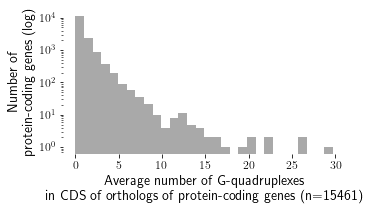

In [6]:
av = [np.mean(GQgene[i]) for i in GQgene]
print(min(av),max(av))
plt.figure(figsize=(5,3))
plt.hist(av,bins=30,color='darkgrey')
plt.yscale('log')
plt.xlabel('Average number of G-quadruplexes\nin CDS of orthologs of protein-coding genes (n=15461)',fontsize=14)
plt.ylabel('Number of \nprotein-coding genes (log)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/CDS_GQ_AveragedCountPerGene.pdf',dpi=400)

In [21]:
print([i for i in av if i > 18])

[22.151041666666668, 29.694736842105264, 20.70408163265306, 20.025510204081634, 19.186528497409327, 26.00507614213198, 26.423280423280424, 22.436842105263157]


In [23]:
print([i for i in GQgene if np.mean(GQgene[i]) > 16])

['COL5A1', 'MEGF8', 'COL7A1', 'COL11A2', 'OBSCN', 'ZNF469', 'COL4A2', 'RYR1', 'COL27A1', 'COL5A3', 'IGFN1']


In [18]:
fl = 0
GQ = {}
with open('./GQuad/UTRs_Orthologs_GQuad') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if len(dat) > 1:
            if dat[0] not in GQ:
                GQ[dat[0]] = []
            GQ[dat[0]].append(int(dat[2]))
        else:
            GQ[dat[0]] = []
json.dump(GQ, open("./GQuad/UTRs_Orthologs_GQ.json","w")) 
GQgene = {}
for item in GQ:
    gene = item.split('|')[1].split(':')[0]
    if gene not in GQgene:
        GQgene[gene] = []
    GQgene[gene].append(len(GQ[item]))
json.dump(GQgene, open("./GQuad/UTRs_Orthologs_GQ_CountPerGene.json","w"))    

13847
0.0 13.740932642487047


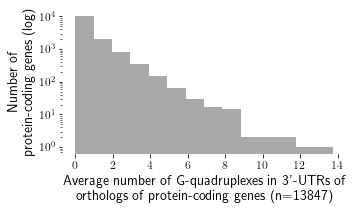

In [10]:
GQgene = json.load(open("./GQuad/UTRs_Orthologs_GQ_CountPerGene.json","r"))
print(len(GQgene))
av = [np.mean(GQgene[i]) for i in GQgene]
print(min(av),max(av))
plt.figure(figsize=(5,3))
plt.hist(av,bins=14,color='darkgrey')
plt.yscale('log')

plt.xlabel("Average number of G-quadruplexes in 3'-UTRs of \northologs of protein-coding genes (n=13847)",fontsize=14)
plt.ylabel('Number of\nprotein-coding genes (log)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11.5)
plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/UTR_GQ_AveragedCountPerGene.pdf',dpi=400)

In [28]:
print([i for i in GQgene if np.mean(GQgene[i]) > 8])

['KMT2D', 'NAT8L', 'MEF2D', 'CBX7', 'NACC2', 'ANKRD33', 'ANKRD52', 'VASH1', 'MLLT6', 'CASTOR2', 'HIC2', 'ELFN2', 'PCDH1', 'ZBTB16', 'IFFO2', 'THRA', 'CBX6', 'SDC3', 'ZBTB7A']
